#### This notebook analyzes statistical metrics and characteristics of maps generated within a predefined pool used for game evaluation.

GREEDY: connects to the closest city in every round

OPTIMAL: best strategy that connects the most cities 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import json

save_path = '/Users/yirangong/Projects/RoadConstruction/MapGeneration/DataSelect/'
read_path= '/Users/yirangong/Projects/RoadConstruction/MapGeneration/DataPool/'

with open(read_path + 'basic_map_1','r') as file: 
    basic_all = json.load(file)

with open(read_path + 'basic_summary_1', 'r') as file:
    savedData = json.load(file)
    
    diff_num_opt_greed=savedData[0] # difference of number of cities collected between optimal and greedy 
    
    # Single map 
    
    # city location of two players in all rounds when optimal
    # starts with round 0 (the starting position)
    optimal_list=savedData[1] # [r0p1, r0p2, r1p1, r2p2, etc]
    
    # list of city location of each player when greedy
    greedy_list_p1=savedData[2]
    greedy_list_p2=savedData[3]
    
    # number of moves in optimal/greedy 
    optimal_move_num=savedData[4] # len(optimal_list[...]) - 1 (minus the start city)
    greedy_move_num_p1=savedData[5] # len(greedy_list1[...])
    greedy_move_num_p2=savedData[6] # len(greedy_list2[...])
    
    # the player number, who has the optimal move in every turn of the game 
    optimalTurn_list=savedData[7] 
    
    # List of remaining budget length for both players (i.e. the budget in total) after each turn 
    # i.e. the player1's first move is at the third position ([2])
    remain_budget_len_opt=savedData[8] # [r0p1, r0p2, r1p1, r2p2, etc]
    remain_budget_len_greed=savedData[9]
    
    # number of cities went by (depth of the tree) by both players when optimal 
    depth_opt=savedData[10] # set(optimal_list[0])
    # the number of possible game plays (leaves)
    treeWidth=savedData[12] 
    
    nOfOpt=savedData[11] # number of optimal lists within all the maps

    
    # ALL THE MAPS
    # list of optimal move lists within a game
    OptPathAll=savedData[13] 
    # list of all the optimal turn lists
    OptTurnsAll=savedData[14]  
    
    delta_contribution=savedData[15]
    contribution_p1=savedData[16] # average of the contrubution (the number of moves people contribute) in all of possible optimal solutions 
    contribution_p2=savedData[17]

    # NOTE: might have new variables 

# 1. Selecting for desired maps

## Base Selection criteria:
#### Starting Position Distance: 
euclidean distance of the two starting points
- 30-200
#### Optimal contribution gap: 
Difference in the number of cities caught in the optimal sotion
- 25% - 75%
- Not Too extreme values


#### Filtering 1: starting position

Before the FILTERING lines, the code shows that among the 1242 maps we have, the first point distance (euclidean distance between the starting positions of the two players) goes from 0-400. 

Now, we added the range of the first point distance to be 30-200, to select for the maps that have somewhat a close starting points.

Map numbers:  [0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 15, 16, 17, 18, 21, 23, 25, 26, 27, 28, 30, 31, 32, 35, 39, 40, 43, 45, 47, 52, 53, 55, 57, 58, 59, 60, 61, 62, 63, 67, 70, 71, 73, 75, 78, 79, 80, 82, 85, 88, 90, 91, 92, 94, 96, 97, 98, 100, 101, 103, 106, 110, 111, 114, 115, 116, 117, 118, 119, 121, 122, 123, 126, 128, 129, 130, 131, 132, 133, 135, 137, 138, 139, 141, 143, 144, 147, 148, 152, 153, 154, 155, 156, 157, 161, 163, 164, 165, 166, 167, 170, 172, 178, 179, 180, 182, 183, 184, 186, 187, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 205, 210, 212, 213, 214, 216, 217, 219, 223, 224, 225, 227, 230, 232, 233, 237, 238, 239, 241, 242, 243, 245, 247, 248, 249, 256, 257, 258, 259, 261, 263, 264, 265, 267, 268, 270, 272, 273, 276, 277, 278, 280, 282, 283, 289, 290, 291, 293, 295, 296, 299, 302, 304, 305, 307, 308, 313, 314, 315, 316, 318, 320, 322, 324, 327, 330, 331, 334, 335, 339, 341, 342, 343, 344, 345, 346, 347, 349, 351, 352, 353, 354, 357, 359, 360, 361, 362, 364, 3

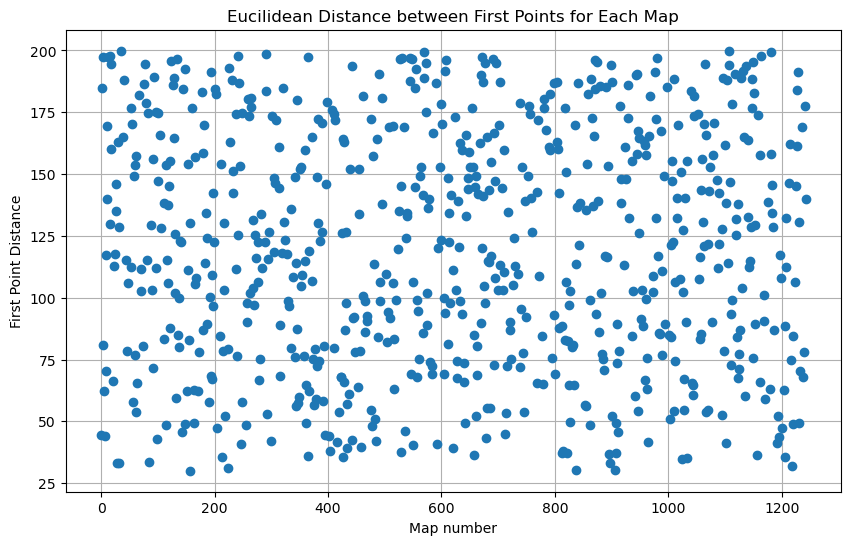

In [8]:
First_Point_Distance = []  
target_list = []  

# distance decision
distance_min = 30
distance_max = 200

caught1=[]
caught2=[]
difference_caught_opt=[]


for ii in range(len(optimal_list)):
    optimal_path1 = [optimal_list[ii][i] for i, item in enumerate(optimalTurn_list[ii]) if item == 1]
    optimal_path2 = [optimal_list[ii][i] for i, item in enumerate(optimalTurn_list[ii]) if item == 2]

    # Retrieve coordinates for the path
    optimalx1 = [(basic_all[ii].get("x"))[point] for point in optimal_path1]
    optimaly1 = [(basic_all[ii].get("y"))[point] for point in optimal_path1]

    # Mark the first point of optimal_path1
    if optimal_path1:
        first_x1 = optimalx1[0]
        first_y1 = optimaly1[0]

    optimalx2 = [(basic_all[ii].get("x"))[point] for point in optimal_path2]
    optimaly2 = [(basic_all[ii].get("y"))[point] for point in optimal_path2]

    # Mark the first point of optimal_path2
    if optimal_path2:
        first_x2 = optimalx2[0]
        first_y2 = optimaly2[0]

    # Compute the Euclidean distance between the first points
    first_point_distance = np.sqrt((first_x2 - first_x1) ** 2 + (first_y2 - first_y1) ** 2)
        
    # FILTERING
    if distance_min < first_point_distance < distance_max:
        
        First_Point_Distance.append(first_point_distance)
        target_list.append(ii)

        # print(f"Distance between first points for index {ii}: {first_point_distance}")
            
            
print("Map numbers: ", target_list)

# Plotting the distances
plt.figure(figsize=(10, 6))
plt.plot(target_list, First_Point_Distance, marker='o', linestyle='None')
plt.title('Eucilidean Distance between First Points for Each Map')
plt.xlabel('Map number')
plt.ylabel('First Point Distance')
plt.grid(True)
plt.show()

#### Filter 1 + Filter 2 Selection Function

In [11]:
def starting_position_distance(optimal_list, map_index, basic_all):
    """
    Calculate the Euclidean distance between the starting positions of Player 1 and Player 2.
    
    Parameters:
        optimal_list (list): List of city locations for both players across maps.
        map_index (int): The index of the map to process.
        basic_all (dict): Dictionary containing x and y coordinates for all points.
    
    Returns:
        float: Euclidean distance between starting positions of Player 1 and Player 2.
    """
    # Retrieve starting positions from the optimal list
    map_data = optimal_list[map_index]
    start_pos_p1 = map_data[0]  # Path index for Player 1's starting position
    start_pos_p2 = map_data[1]  # Path index for Player 2's starting position

    # Extract x and y coordinates for the starting positions
    x1 = basic_all[map_index]["x"][start_pos_p1]
    y1 = basic_all[map_index]["y"][start_pos_p1]
    x2 = basic_all[map_index]["x"][start_pos_p2]
    y2 = basic_all[map_index]["y"][start_pos_p2]

    # Compute Euclidean distance
    distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

    return distance


def count_contribution(optimal_list, optimalTurn_list, map_index, player=1):
    """
    Calculate the contribution of a single player as the difference_caught / total_caught.

    Parameters:
        optimal_list (list): List of city locations for both players across maps.
        optimalTurn_list (list): List of player turns (1 or 2) indicating who makes a move in each round across maps.
        map_index (int): The index of the map to process.
        player (int): The player (1 or 2) whose contribution is to be calculated.

    Returns:
        float: Contribution of the specified player (difference_caught / total_caught).
    """
    optimal_path_p1 = []  # Path for Player 1
    optimal_path_p2 = []  # Path for Player 2

    # Get the specific map data
    map_optimal_list = optimal_list[map_index]
    map_optimalTurn_list = optimalTurn_list[map_index]

    # Separate the cities based on player turns
    for i, turn in enumerate(map_optimalTurn_list):
        if turn == 1:
            optimal_path_p2.append(map_optimal_list[i])
        elif turn == 2:
            optimal_path_p1.append(map_optimal_list[i])

    # Count unique cities caught by each player
    unique_cities_p1 = set(optimal_path_p1)
    unique_cities_p2 = set(optimal_path_p2)

    num_caught_p1 = len(unique_cities_p1)  # Unique cities for Player 1
    num_caught_p2 = len(unique_cities_p2)  # Unique cities for Player 2

    # Total unique cities caught by both players combined
    caught_total = len(unique_cities_p1.union(unique_cities_p2))

    # Difference in cities caught
    difference_caught = abs(num_caught_p1 - num_caught_p2)
    
    contribution = num_caught_p1 / caught_total
    # print(contribution)

    return round(contribution * 100)

#### map_contri_filtered returns the list of maps with our 2 baseline criterion

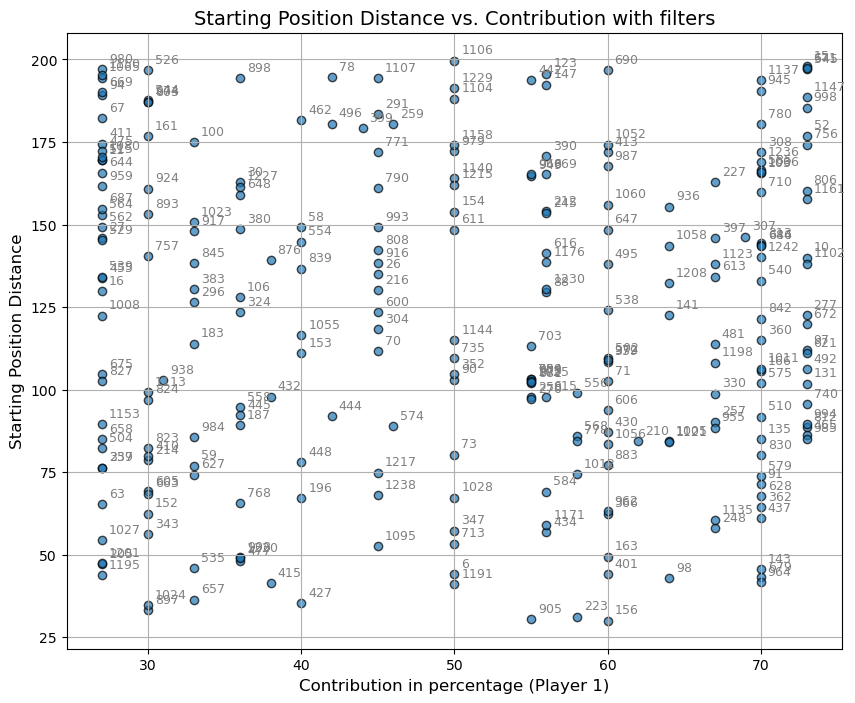

Map Indices with/out contribution filtering: [6, 10, 11, 15, 16, 26, 27, 30, 52, 58, 59, 63, 67, 70, 71, 73, 78, 88, 90, 91, 94, 97, 98, 100, 103, 106, 123, 131, 135, 141, 143, 147, 152, 153, 154, 156, 161, 163, 166, 183, 187, 196, 205, 210, 212, 214, 216, 223, 227, 239, 245, 248, 257, 258, 259, 270, 277, 291, 296, 304, 307, 308, 313, 324, 330, 339, 343, 347, 352, 357, 360, 362, 366, 380, 383, 390, 397, 399, 401, 410, 411, 413, 415, 427, 430, 432, 434, 437, 442, 444, 445, 448, 455, 462, 465, 475, 477, 481, 492, 495, 496, 502, 504, 510, 515, 526, 529, 535, 538, 539, 540, 544, 545, 554, 556, 558, 562, 564, 568, 574, 575, 579, 584, 585, 600, 605, 606, 611, 613, 615, 616, 621, 627, 628, 644, 646, 647, 648, 657, 658, 663, 669, 671, 672, 674, 675, 679, 684, 687, 690, 703, 709, 710, 713, 735, 740, 756, 757, 768, 771, 778, 780, 790, 803, 806, 808, 812, 823, 824, 827, 830, 839, 842, 845, 869, 876, 881, 883, 893, 897, 898, 905, 908, 916, 917, 924, 936, 938, 945, 949, 954, 955, 959, 962, 964, 966

In [14]:
starting_distances = []
contributions = []
map_contri_filtered = []

def get_info():
    contributions.append(contribution)
    # Store the map index
    map_contri_filtered.append(map_index)
    # Compute starting position distance
    distance = starting_position_distance(optimal_list, map_index, basic_all)
    starting_distances.append(distance)
    return contributions, starting_distances

# Iterate over all maps
for i in range(len(target_list)):
    map_index = target_list[i]
    filter = True;

    # Compute contribution for Player 1
    contribution = count_contribution(optimal_list, optimalTurn_list, map_index, player=1)

    if filter:
        if 25 < contribution < 75: 
            # print(map_index)
            get_info()
    else: get_info()

# Plot the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(contributions, starting_distances, alpha=0.7, edgecolor='k')

# Add annotation to data points with the corresponding map index
for i in range(len(contributions)):  
    plt.annotate(str(map_contri_filtered[i]),  # Convert map index to string
                 (contributions[i], starting_distances[i]),  # Position of the point
                 textcoords="offset points",
                 xytext=(5,5),  # Offset to prevent overlap
                 ha='left', fontsize=9, color='grey')


# Add labels, title, and grid
plt.title("Starting Position Distance vs. Contribution with filters", fontsize=14)
plt.xlabel("Contribution in percentage (Player 1)", fontsize=12)
plt.ylabel("Starting Position Distance", fontsize=12)
plt.grid(True)

# Display the plot
plt.show()
print("Map Indices with/out contribution filtering:", map_contri_filtered)

## Exploring more features with baseline maps
based on starting position 30-200 & optimal contribution gap bewteen 25% - 75%

#### number of optimal solution & depth of map
- negative correlation

Map indices with filtering:  [10, 11, 15, 26, 27, 30, 52, 59, 63, 67, 70, 73, 78, 88, 90, 91, 94, 97, 100, 103, 106, 123, 131, 135, 141, 143, 147, 152, 153, 154, 156, 161, 163, 166, 183, 187, 196, 212, 214, 216, 223, 227, 239, 248, 257, 258, 259, 291, 296, 304, 307, 308, 313, 324, 339, 343, 347, 357, 360, 362, 366, 383, 390, 397, 399, 401, 410, 413, 415, 427, 430, 432, 434, 437, 442, 444, 445, 448, 455, 462, 465, 475, 492, 496, 502, 510, 515, 526, 529, 535, 538, 539, 540, 545, 554, 556, 562, 564, 568, 574, 575, 579, 585, 600, 605, 606, 611, 616, 621, 627, 628, 644, 646, 647, 648, 657, 658, 663, 669, 671, 672, 674, 675, 679, 684, 709, 710, 713, 735, 740, 756, 757, 768, 771, 778, 780, 790, 803, 806, 808, 812, 823, 824, 827, 830, 839, 842, 845, 869, 881, 883, 893, 897, 898, 905, 908, 916, 924, 936, 938, 945, 949, 954, 955, 962, 966, 972, 973, 979, 984, 985, 987, 993, 994, 998, 1005, 1008, 1011, 1012, 1023, 1024, 1027, 1028, 1055, 1056, 1058, 1060, 1065, 1066, 1080, 1095, 1102, 1104, 1106,

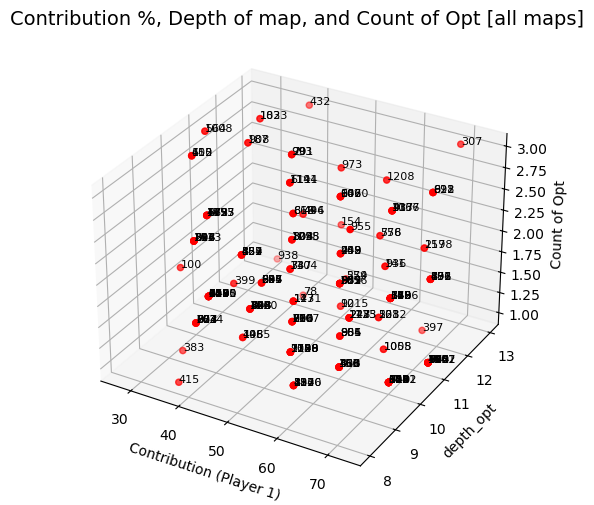

In [65]:
# Create a 3D figure

contributions_all = []
depth_opt_all = []
nOfOpt_all = []
map_filtered_cdn = []

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

def get_info_cdn():
    contributions_all.append(contribution)
    depth_opt_all.append(depth_opt[map_index])
    nOfOpt_all.append(nOfOpt[map_index])
    map_filtered_cdn.append(map_index)
    return contributions_all, depth_opt_all, nOfOpt_all, map_filtered_cdn


for i in range(len(target_list)):
    map_index = target_list[i]
    contribution = count_contribution(optimal_list, optimalTurn_list, map_index, player=1)

    # filtering for n of opt
    if (nOfOpt[map_index] < 4 and 25 < contribution < 75): 
        get_info_cdn()

print("Map indices with filtering: ", map_filtered_cdn)

# Plot the points
ax.scatter(contributions_all, depth_opt_all , nOfOpt_all, c='r', marker='o')

# Add labels to each point
for i in range(len(contributions_all)):
    ax.text(
        contributions_all[i], 
        depth_opt_all[i], 
        nOfOpt_all[i], 
        f'{map_filtered_cdn[i]}',  # Label as map index or any desired label
        fontsize=8
    )
    
ax.set_xlabel("Contribution (Player 1)")
ax.set_ylabel("depth_opt")
ax.set_zlabel("Count of Opt")

# Add a title
ax.set_title("Contribution %, Depth of map, and Count of Opt [all maps]", fontsize=14)

plt.show()

### Territory of Opt

The more farther away the two players move from each other, the more missteps

In [68]:
def extract_optimal_paths(optimal_list, optimalTurn_list, map_index):
    """
    Extracts the optimal paths for each player from the optimal list.

    Parameters:
        optimal_list (list): List of city locations for both players across maps.
        optimalTurn_list (list): List of player turns (1 or 2) indicating who makes a move in each round across maps.
        map_index (int): The index of the map to process.

    Returns:
        tuple: Two lists containing the optimal paths for Player 1 and Player 2.
    """
    optimal_path_p1 = []  # Path for Player 1
    optimal_path_p2 = []  # Path for Player 2

    # Get the specific map data
    map_optimal_list = optimal_list[map_index]
    map_optimalTurn_list = optimalTurn_list[map_index]

    # Loop over each turn in the map
    for i, turn in enumerate(map_optimalTurn_list):
        if turn == 1:
            optimal_path_p1.append(map_optimal_list[i])
        elif turn == 2:
            optimal_path_p2.append(map_optimal_list[i])

    return optimal_path_p1, optimal_path_p2

def calculate_distances(optimal_list, basic_all, optimalTurn_list, target_map_indices):
    """
    Calculate the distances between two players across multiple maps.

    Parameters:
        optimal_list (list): List of city locations for both players across maps.
        basic_all (dict): Dictionary containing x and y coordinates for all points.
        optimalTurn_list (list): List of player turns (1 or 2) indicating who makes a move in each round across maps.
        target_map_indices (list): Indices of target maps.

    Returns:
        list: A list of distance arrays for each map.
    """
    all_distances = []

    for map_index in target_map_indices:
        
        optimal_path_p1, optimal_path_p2 = extract_optimal_paths(optimal_list, optimalTurn_list, map_index)
    
        # Retrieve coordinates for each player's path
        optimalx1 = [(basic_all[map_index].get("x"))[point] for point in optimal_path_p1]
        optimaly1 = [(basic_all[map_index].get("y"))[point] for point in optimal_path_p1]
        optimalx2 = [(basic_all[map_index].get("x"))[point] for point in optimal_path_p2]
        optimaly2 = [(basic_all[map_index].get("y"))[point] for point in optimal_path_p2]

        # Pad paths to ensure equal lengths
        max_length = max(len(optimalx1), len(optimalx2))
        optimalx1 = np.pad(optimalx1, (0, max_length - len(optimalx1)), mode='edge')
        optimaly1 = np.pad(optimaly1, (0, max_length - len(optimaly1)), mode='edge')
        optimalx2 = np.pad(optimalx2, (0, max_length - len(optimalx2)), mode='edge')
        optimaly2 = np.pad(optimaly2, (0, max_length - len(optimaly2)), mode='edge')

        # Compute Euclidean distances
        distances = np.sqrt(
            np.power(np.array(optimalx1) - np.array(optimalx2), 2) +
            np.power(np.array(optimaly1) - np.array(optimaly2), 2)
        )
        all_distances.append(distances)

    return all_distances

def calculate_slopes(all_distances, target_map_index):
    """
    Calculate the slopes of distance trends for multiple maps.

    Parameters:
        all_distances (list): List of distance arrays for each map.

    Returns:
        list: Slopes of distance trends for each map.
    """
    slope_list = []

    for distances in all_distances:
        x_values = np.arange(len(distances))  # Use array indices as x-values
        slope, _ = np.polyfit(x_values, distances, 1)  # Fit a linear trend
        slope_list.append(slope)

    return slope_list

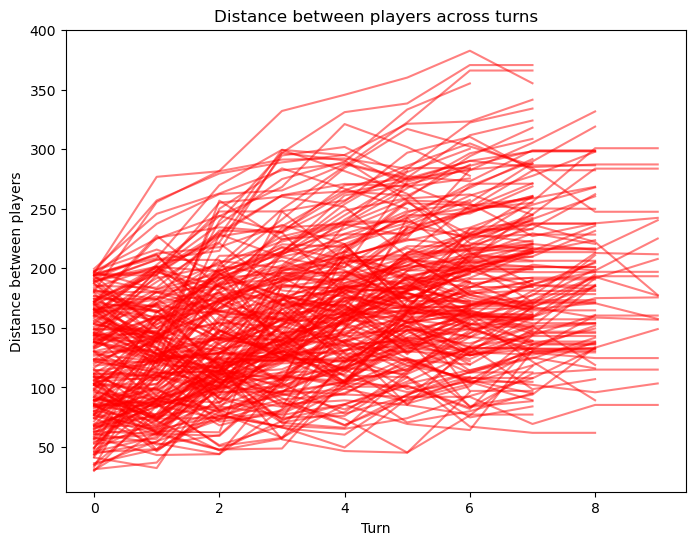

In [23]:
# Change this into the desired list of maps
input_map = map_filtered_cdn

all_distances = calculate_distances(optimal_list, basic_all, optimalTurn_list, input_map)

plt.figure(figsize=(8, 6))
for distances in all_distances:
    plt.plot(distances, color='red', alpha=0.5)  # Adjust transparency for overlapping lines

plt.xlabel("Turn")
plt.ylabel("Distance between players")
plt.title("Distance between players across turns")
plt.show()


# 2. Inspect basic features

#### Coordinates

In [26]:
map_data = optimal_list[0]

start_pos_p1 = map_data[0]  # Path index for Player 1's starting position
print(start_pos_p1)

start_pos_p2 = map_data[1]  # Path index for Player 2's starting position
print(start_pos_p2)

x_coords = basic_all[0]["x"]
print(x_coords)

y_coords = basic_all[0]["y"]
print(y_coords)

4
15
[13, 143, 135, 125, -25, 35, -40, 153, 168, 16, 15, -37, -125, 156, 66, -19, 22, 53, -17, 182, 25, 76, 39, -140, 61, -23, 125, -106, -38, 45]
[-153, -44, 119, -41, -194, -137, -173, -69, -98, -119, 78, 64, -56, -44, 183, -150, 143, -70, 187, 62, 22, -148, 99, 14, -101, 59, -141, 91, -16, 76]


#### Plot slope against target_variable

In [29]:
slope_list = calculate_slopes(all_distances, input_map)
xvalue = []
target_variable = ""
zvalue = []

for map_index in input_map:
    
    # change this to get the desired variable info
    contribution = count_contribution(optimal_list, optimalTurn_list, map_index, player=1)
    xvalue.append(contribution)

    target_variable = "contribution"
    zvalue.append(nOfOpt[map_index])
    
    # print(f"Map {map_index}: Slope = {slope:.2f} (Players {'move away from' if slope > 0 else 'move toward'} each other)")

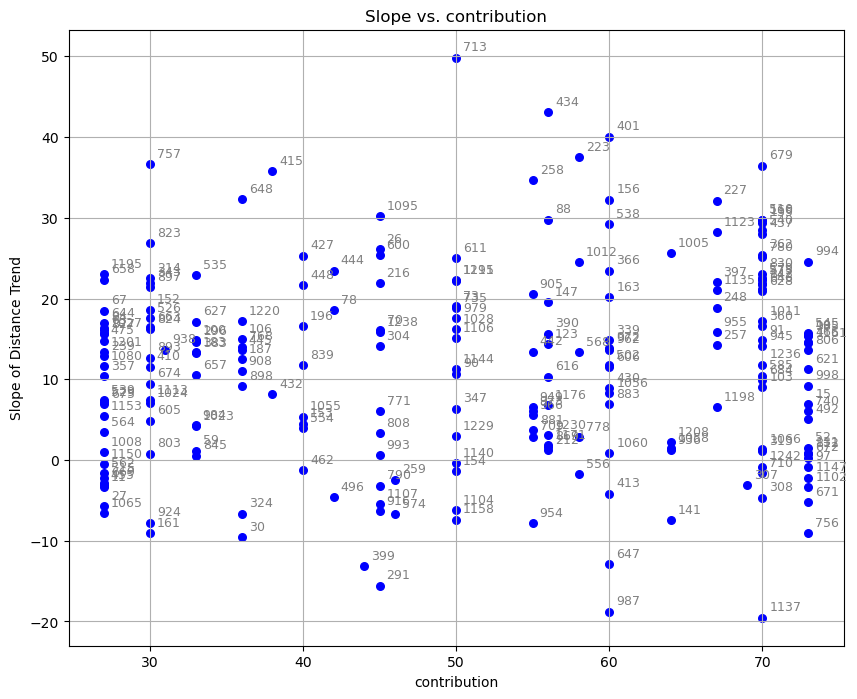

In [31]:
plt.figure(figsize=(10,8))  
plt.scatter(xvalue, slope_list, s=30, color='b')


# Scatter plot
ax.scatter(xvalue, slope_list, s=50, color='b')

# Add annotation to data points with the corresponding map index
for i in range(len(input_map)):  
    plt.annotate(str(input_map[i]),  # Convert map index to string
                 (xvalue[i], slope_list[i]),  # Corrected position for each point
                 textcoords="offset points",
                 xytext=(5,5),  # Offset to prevent overlap
                 ha='left', fontsize=9, color='grey')

# Labels and title
plt.xlabel(f"{target_variable}")
plt.ylabel("Slope of Distance Trend")
plt.title(f"Slope vs. {target_variable}")
plt.grid(True)

# Show the plot
plt.show()

3D plot

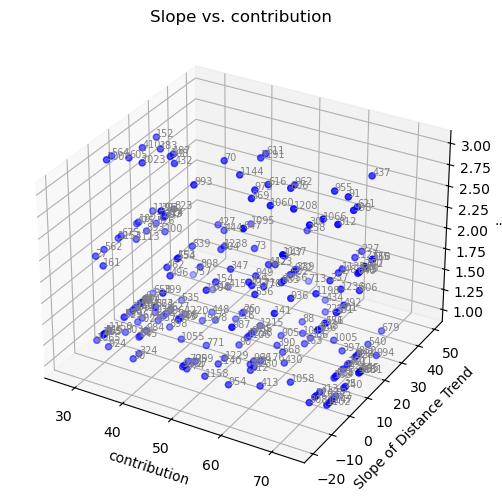

In [53]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

selected_list = [70, 15, 1137, 883, 627, 1095, 444, 823, 432, 574, 994, 644, 812, 616, 674, 1191, 141, 945, 564, 1065, 568, 1161, 437, 360, 442, 258, 600, 163, 554, 91, 445, 427, 27, 154, 713, 492, 1153, 1056, 1058, 897, 415, 397, 893, 540, 1055, 962, 304, 979, 313, 1176, 223, 669, 78, 1195, 131, 985, 1080, 839, 510, 954]

# Scatter plot
ax.scatter(xvalue, slope_list, zvalue, s=20, color='b')

# Add annotation to data points with the corresponding map index
for i in range(len(input_map)):  
    ax.text(xvalue[i], slope_list[i], zvalue[i],  # Corrected position for each point
            str(input_map[i]),  # Convert map index to string
            fontsize=7, color='grey', ha='left')

# Labels and title
ax.set_xlabel(f"{target_variable}")
ax.set_ylabel("Slope of Distance Trend")
ax.set_zlabel("..?")
ax.set_title(f"Slope vs. {target_variable}")
ax.grid(True)

# Show the plot
plt.show()

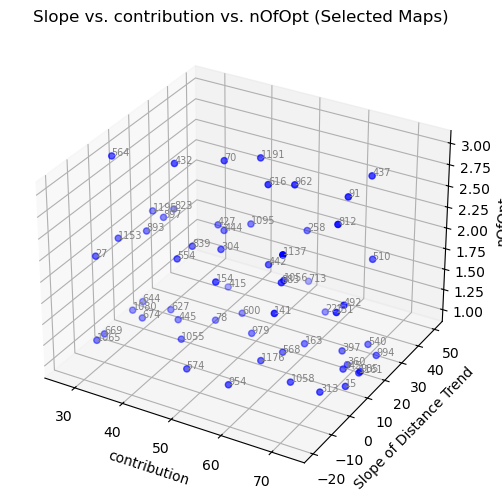

In [36]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

selected_list = [70, 15, 1137, 883, 627, 1095, 444, 823, 432, 574, 994, 644, 812, 616, 674, 1191, 141, 945, 564, 1065, 568, 1161, 437, 360, 442, 258, 600, 163, 554, 91, 445, 427, 27, 154, 713, 492, 1153, 1056, 1058, 897, 415, 397, 893, 540, 1055, 962, 304, 979, 313, 1176, 223, 669, 78, 1195, 131, 985, 1080, 839, 510, 954]

# Filter data based on selected_list
filtered_indices = [i for i, num in enumerate(input_map) if num in selected_list]
x_filtered = [xvalue[i] for i in filtered_indices]
slope_filtered = [slope_list[i] for i in filtered_indices]
z_filtered = [zvalue[i] for i in filtered_indices]
input_map_filtered = [input_map[i] for i in filtered_indices]

# Scatter plot (only selected points)
ax.scatter(x_filtered, slope_filtered, z_filtered, s=20, color='b')

# Add annotations (only for selected points)
for x, y, z, num in zip(x_filtered, slope_filtered, z_filtered, input_map_filtered):
    ax.text(x, y, z, str(num), fontsize=7, color='grey', ha='left')

# Labels and title
ax.set_xlabel(f"{target_variable}")
ax.set_ylabel("Slope of Distance Trend")
ax.set_zlabel("nOfOpt")
ax.set_title(f"Slope vs. {target_variable} vs. nOfOpt (Selected Maps)")
ax.grid(True)

plt.show()

### Below are the code that explores properties given a specific map. 

In [39]:
example_map = 4

In [55]:
## Extract the optimal path for each player from the optimal list
optimal_path_p1 = []
optimal_path_p2 = []

for ii in range(len(optimal_list)):

    ind = ii
    
    # Extract indices for which the turn is '1' (second player)
    path1 = [optimal_list[ind][i] for i, item in enumerate(optimalTurn_list[ind]) if item == 1]
    optimal_path_p2.append(path1)
    
    # Extract indices for which the turn is '2' (first player)
    path2 = [optimal_list[ind][i] for i, item in enumerate(optimalTurn_list[ind]) if item == 2]
    optimal_path_p1.append(path2)


print(optimal_path_p1[example_map])
print(optimal_path_p2[example_map])

[17, 17, 13, 13, 13, 13, 13, 13, 13, 13]
[6, 20, 29, 10, 24, 14, 21, 5, 4]


In [43]:
# starting from the 1st move, how much budget individual moved 

used_budget_opt_p1 = []
used_budget_opt_p2 = []


# Iterate through each sublist in remain_budget_len_opt
for sublist in remain_budget_len_opt:
    
    differences = []  # Reset differences list for each sublist
    
    # Calculate differences between each consecutive pair of elements
    for i in range(len(sublist) - 2):
        
        # we start from the 2nd element (i.e. the first move)
        delta =  sublist[i+1] - sublist[i + 2]
        differences.append(delta)
    

        # print("First Sublist:", sublist)
        # print("Differences in First Sublist:", differences)

        
    used_budget_opt_p1.append(differences[::2])  # Elements at even indices
    used_budget_opt_p2.append(differences[1::2])  # Elements at odd indices   


print(used_budget_opt_p1[example_map])
print(used_budget_opt_p2[example_map])

[0.0, 21.377558326431938, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[42.755116652863876, 32.75667870831839, 26.172504656604787, 33.24154027718933, 61.81423784210236, 34.0147027033899, 20.248456731316587, 28.844410203711913]
